In [1]:
import pandas as pd
df = pd.read_csv("../data/Library_Usage.csv")

In [2]:
df['Age Range'].value_counts()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [3]:
df['Age Range'].value_counts(normalize=True)

25 to 34 years       0.215208
35 to 44 years       0.159227
10 to 19 years       0.139271
45 to 54 years       0.124026
0 to 9 years         0.090357
65 to 74 years       0.071216
20 to 24 years       0.070318
55 to 59 years       0.050161
60 to 64 years       0.046783
75 years and over    0.033433
Name: Age Range, dtype: float64

In [4]:
age_mode = df['Age Range'].mode()
age_mode[0]

'25 to 34 years'

## 3.1 Häufigkeiten (20 Min)

    Erstelle eine Häufigkeitsverteilung für die Variable 'Year Patron Registered'. Wieviel Prozent der Kunden wurden 2013 im System registriert? Wie viele in den kommenden Jahren? Was fällt Dir auf?
    2013    0.113948 -> 11,39%, in 2014 dann 12,25%, in 2015 bereits 12,74%. - Auffällig ist, dass im Umstellungsjahr 16,35% Kunden regestriert wurden -> was natürlich auch einleuchtet, weil der gesamte Kundenstamm ins neue System überführt wurde.
    
    Wieviel Prozent der Kunden sind zwischen 25 und 34 Jahren?
    25 to 34 years       0.215208 -> 21,52%
    
    Ersetze die fehlenden Werte in der Spalte Age Range durch den Modus dieser Spalte. Nutze dazu die Funktion DataFrame.fillna (siehe hier für die Dokumentation).
    -> erledigt
    
    Denkst Du, es handelt sich dabei um eine gute Methode, fehlende Werte zu ersetzen? Welche anderen Strategien fallen Dir ein?
    Ich denke, die fehlenden Werte durch den Modus der Spalte zu ersetzen, ist keine gute Methode. Wir ignorieren hierbei die gegebene Verteilung der Werte komplett und begünstigen den Häufigsten überproportional. Entweder lassen wir diese Zeilen aus der Betrachtung raus (in der Annahme, dass dort eine ähnliche Verteilung herrschen wird wie in der Beobachtung) oder aber wir füllen die fehlenden Werte entsprechend ihrer Häufigkeitsverteilung auf -> 21,52% erhalten 25-34 usw.
    Vermutlich ist Rauslöschen aber die sicherste Methode, damit man die Antworten auf andere Fragestellungen nicht verzerrt -> Angenommen ich berücksichtige beim Auffüllen die Häufigkeitsverteilung... ich müsste dann alles Spalten miteinander ins Verhältnis setzen um wirklich fair zu verteilen (rekursiv, weil andere ja auch fehlende Werte haben) -> denn sonst erhalten vllt. beim willkürlichen, häufigkeitsverteiltem Auffüllen all diejenigen mit überaus hohen Ausleihzahlen die Altergruppe 0-9, obwohl dies in der Realität garnicht möglich wäre, weil man dazu eine jahrzehnte dauernde Mitgliedschaft benötigt und Vielnutzer sein müsste -> welche 0-9 Jährigen haben 5000+ Ausleihen?

In [5]:
df['Year Patron Registered'].value_counts(normalize=True)

2003    0.163555
2015    0.127409
2014    0.122570
2013    0.113948
2012    0.088311
2011    0.062655
2016    0.062081
2010    0.057436
2009    0.052679
2008    0.048455
2007    0.031383
2006    0.025448
2005    0.022832
2004    0.021240
Name: Year Patron Registered, dtype: float64

In [6]:
df['Age Range'].fillna(age_mode[0], inplace=True)
df['Age Range'].value_counts()

25 to 34 years       91298
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

In [7]:
df['Total Checkouts'].mean()

161.98209697530748

In [8]:
df['Total Checkouts'].median()

19.0

## 3.2 Mittelwert und Median (20 Min)

    Schau Dir den Mittelwert und den Median der Variable Total Checkouts an. Warum sind die beiden Werte so unterschiedlich?
    Der Mittelwert errechnet sich aus der Summe aller Ausleihen, geteilt durch die Anzahl an Nutzern.
    Der Median gibt mir den Wert zurück, der genau in der Mitte der numerisch sortierten Ausleihen steht: Bei 10 nach Ausleihen sortierten Nutzern die Ausleihen von Person 5, bei 100 nach Ausleihen sortierten Nutzern die Ausleihen von Person 50, bei 1000 nach Ausleihen sortierten Nutzern die Ausleihen von Person 500 etc.
    
    Was ziehst Du daraus für Schlüsse für weitere statistische Analysen und Reports?
    Der Median ist relativ unbeeinflußt von Extremen bzw. Ausreißern, vorausgesetzt dass die Erhebung ausreichend groß ist -> ob nun extreme Vielnutzer oder Karteileichen...es spielt keine große Rolle ob diese vorhanden sind oder fehlen. Der typische Nutzer wird irgendwo in der Mitte liegen...und nicht beim rechnerischen Durchschnitt.
    
    Angenommen wir haben 10 Nutzer und 1 Nutzer hat 10000 Ausleihen, während alle anderen nur 10 haben. Dann hätte jeder Nutzer im Durchschnitt zwar über 1000 Ausleihen, in der Realität hat der typische Nutzer aber das was in der Mitte liegt...nämlich 10. 

In [9]:
df['Total Checkouts'].quantile(q=[0.25, 0.5, 0.75])

0.25      2.0
0.50     19.0
0.75    113.0
Name: Total Checkouts, dtype: float64

In [10]:
# identifies 0.5% of the data at both ends of the distribution
alpha = 0.005
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.005       0.00
0.995    2827.53
Name: Total Checkouts, dtype: float64

In [11]:
# identifies 1% of the data at both ends of the distribution -> die Eliten ;-)
alpha = 0.01
df['Total Checkouts'].quantile([alpha, 1-alpha])

0.01       0.0
0.99    2118.0
Name: Total Checkouts, dtype: float64

## 3.3 Exkurs: Ausreißerentfernung I (30 Min)

    Identifziere jeweils die 1.5% größten Werte in der Spalte Total Checkouts. Definiere diese Werte als Ausreißer.
    -> df_filtered1 und df_filtered2
    
    Erstelle einen Datensatz, für den diese Ausreißer entfernt sind.
    -> df_filtered3
    
    Handelt es sich hierbei um eine gute Methode, Ausreißer zu identifizieren und zu behandeln? Welche anderen Strategien kennst Du?
    Im Prinzip ja, man sollte allerdings darauf achten wie viel man wegschneidet...sprich, wann ist es wirklich ein Ausreißer und wann ist es ein -nennen wir es mal- Edgecase oder Special Case. Sind extreme Vielnutzer wirklich Ausreißer oder sind sie nicht doch eine Nutzergruppe, die vllt. gerade deshalb besondern untersuchenswert wäre?
    Wir könnten die Ausreißer (in beide Richtungen) auch dadurch glätten, dass wir eine logarithmische Skala verwenden. Vielleicht wäre ein Ansatz auch unsere Erhebung zu Gruppieren,so wie dies beim Alter bereits passiert -> 0-9 Ausleihen, 10-99 Ausliehen, 100-999 Ausleihen, etc.
    In der Bildverarbeitung werden Schwellenwerte benutzt, um zu ermitteln welhes Pixel bei der Binarisierung bleiben soll und welches nicht. Gleiches gilt hier -> welche Erhebung bleibt und welche nicht. Es gibt dynamische, lokale und globale Schwellenwerte. Vielleicht wäre es ja möglich Otsu's Methode auf die Erhebung anzuwenden?

In [12]:
# identifies 1.5% of the data at both ends of the distribution
alpha = 0.015
quantile = df['Total Checkouts'].quantile([alpha, 1-alpha])
print(quantile)

0.015       0.0
0.985    1757.0
Name: Total Checkouts, dtype: float64


In [13]:
df_filtered1 = df[(df['Total Checkouts'] <= quantile[alpha])]
df_filtered1

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
5,3,SENIOR,0,0,65 to 74 years,C2,Chinatown,None,None,z,email,True,2015,True,NaN
11,0,ADULT,0,0,25 to 34 years,P7,Potrero,None,None,z,email,True,2013,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423436,16,DIGITAL ACCESS CARD,0,0,10 to 19 years,P1,Park,None,None,z,email,True,2016,True,NaN
423437,1,JUVENILE,0,0,0 to 9 years,W4,Western Addition,None,None,z,email,True,2015,False,5.0
423438,0,ADULT,0,0,10 to 19 years,W4,Western Addition,None,None,z,email,True,2015,True,NaN
423439,1,JUVENILE,0,0,0 to 9 years,N4,Noe Valley/Sally Brunn,None,None,z,email,True,2015,False,8.0


In [14]:
df_filtered2 = df[(df['Total Checkouts'] >= quantile[1-alpha])]
df_filtered2

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
6,0,ADULT,3002,1689,25 to 34 years,P5,Portola,July,2016,p,phone,True,2004,False,9.0
32,0,ADULT,1989,3146,45 to 54 years,M6,Mission,May,2016,z,email,True,2003,False,8.0
102,0,ADULT,2630,1501,45 to 54 years,M4,Merced,July,2016,p,phone,False,2003,True,NaN
193,0,ADULT,8984,310,60 to 64 years,C2,Chinatown,July,2016,z,email,True,2003,True,NaN
212,0,ADULT,1805,261,20 to 24 years,R3,Richmond,December,2013,z,email,True,2003,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423377,2,YOUNG ADULT,1847,1465,10 to 19 years,E9,Excelsior,July,2016,z,email,True,2003,False,11.0
423416,2,YOUNG ADULT,2428,1280,10 to 19 years,P3,Parkside,April,2016,z,email,True,2003,False,7.0
423422,2,YOUNG ADULT,3914,359,10 to 19 years,P5,Portola,July,2016,p,phone,False,2010,False,9.0
423423,0,ADULT,2592,487,10 to 19 years,I5,Ingleside,January,2016,p,phone,False,2003,False,10.0


In [15]:
df_filtered3 = df[(df['Total Checkouts'] > quantile[alpha]) & (df['Total Checkouts'] < quantile[1-alpha])]
df_filtered3

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0
7,0,ADULT,4,0,25 to 34 years,C2,Chinatown,July,2014,p,phone,True,2014,False,5.0
8,0,ADULT,20,0,25 to 34 years,S7,Sunset,June,2015,z,email,True,2011,False,7.0
9,0,ADULT,3,1,60 to 64 years,A5,Anza,June,2016,z,email,True,2013,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423442,2,YOUNG ADULT,608,364,10 to 19 years,S7,Sunset,July,2016,z,email,True,2003,False,7.0
423443,0,ADULT,291,13,10 to 19 years,P5,Portola,March,2015,p,phone,False,2009,False,9.0
423444,0,ADULT,15,11,60 to 64 years,M8,Mission Bay,July,2016,z,email,True,2016,False,6.0
423445,5,STAFF,208,58,0 to 9 years,B4,Bernal Heights,July,2016,z,email,True,2014,False,9.0


In [16]:
df['Total Checkouts'].var()

205847.027758416

In [17]:
df['Total Checkouts'].std()

453.7036783611259

In [18]:
df['Total Checkouts'].std() * df['Total Checkouts'].std()

205847.027758416

In [19]:
df['Total Checkouts'].var() == df['Total Checkouts'].std() * df['Total Checkouts'].std()

True

## 3.4 Varianz (15 Min)

Welche Variable streut mehr: 'Total Checkouts' oder 'Total Renewals'? Vergleiche die Standardabweichungen und den Variationskoeffizienten miteinander.

Standardabweichung bei TC ist sehr hoch, viel höher als bei TR -> allerdings für den Vergleich ungeeignet.
VarKoeff ist bei TC bei 2,8 und bei TR bei 3,7!. VarKoeff ist dimensionslos, normalisiert und direkt vergleichbar. 

Total Renewals streut zu 34% mehr.

In [20]:
TC_mean = df['Total Checkouts'].mean()
TC_std = df['Total Checkouts'].std()
TC_cv = TC_std/TC_mean
print(TC_mean)
print(TC_std)
print(TC_cv)

161.98209697530748
453.7036783611259
2.8009495298130904


In [21]:
TR_mean = df['Total Renewals'].mean()
TR_std = df['Total Renewals'].std()
TR_cv = TR_std/TR_mean
print(TR_mean)
print(TR_std)
print(TR_cv)

59.657327464056976
225.0099169494503
3.7717062851167245


In [22]:
TR_cv/TC_cv -1

0.346581309292072

In [23]:
# Spannweite
df['Total Checkouts'].max() - df['Total Checkouts'].min()

35907

In [24]:
# Interquantilabstand
df['Total Checkouts'].quantile(q=0.75) - df['Total Checkouts'].quantile(q=0.25)

111.0

## 3.5 Exkurs: Ausreißerentfernung II (30 Min)

    Identifiziere positive Ausreißer in der Spalte Total Checkouts. Ausreißer werden jetzt als Beobachtungen xi

    definiert, für die gilt:
    xi>x0.75+1.5xIQR

    Das heißt, eine Beobachtungen gilt als Ausreißer, wenn sie größer als die Summe aus dem 75% Quantil und dem 1.5-fachen des Interquartilsabstands ist.

    Wie viel Prozent der Beobachtungen im Datensatz werden mit dieser Methode als Ausreißer markiert?
    -> 14.11%

In [25]:
IQR=(df['Total Checkouts'].quantile(q=0.75) - df['Total Checkouts'].quantile(q=0.25))*1.5
print(IQR)

166.5


In [26]:
x075=df['Total Checkouts'].quantile(q=0.75)
print(x075)

113.0


In [27]:
xi = x075 + IQR
print(xi)

279.5


In [28]:
df_filtered5 = df[(df['Total Checkouts'] < xi)]
((df.shape[0]-df_filtered5.shape[0])/df.shape[0])*100

14.10940658593263

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Checkouts'>

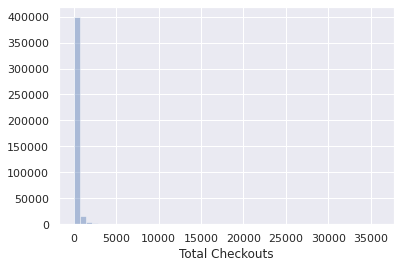

In [29]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv("../data/Library_Usage.csv")
sns.distplot(df['Total Checkouts'], kde=False)

## 3.7 Exkurs: Ausreißerentfernung III (30 Min)

    Erstelle eine neue Spalte 'Total Checkouts Sqrt', die die Wurzel über die Spalte Total Checkouts enthält. Die Wurzel für jede Beobachtung kannst Du mit df['Total Checkouts']**(0.5) berechnen.
    -> erledigt
    
    Schaue Dir das Histogramm von 'Total Checkouts Sqrt' an und charakterisiere die Verteilung.
    -> linkssteile univariate Verteilung
    
    Vergleiche diese Methode mit den vorherigen zwei Verfahren zur Ausreißerbehandlung (Aufgaben 3.3 und 3.5). Welche Methode findest Du besser geeignet, um mit fehlenden Werten umzugehen?
    -> die Methode die Wurzel zu ziehen, ist einfach und eingängig und leicht zu visualisieren. wir müssen trotzdem noch die Methoden aus 3.3 und 3.5 anwenden, um festzulegen was überhaupt ein Ausreißer ist. Da wir aber normalisiertere Werte haben, sind extreme Ausreißer weiterhin stark abgesetzt, wohingegen großer Unterschiede kleiner geworden sind. Die Daten zu glätten ist damit eine sinnvolle Methode, weil danach nur noch 7,12% der Daten als Ausreißer betrachtet werden, wenn wir die Methode aus 3.5 anwenden. Spannend wäre nun noch die Frage nach dem Logarithmus (dekadisch)...schlägt fehlt, weil wir 0-Werte haben (Null Ausleihen!), aber auch, weil anschließend nicht ordentlich per Interquantil & Co. gefiltert werden kann -> es entstehen durch das Aufsummieren Werte, die in der Logarithmischen Skala garnicht mehr vorkommen und damit wird plötzlich nichts mehr Ausreißer -> sinnvoll oder nicht?!
    
    Fallen Dir Vor- und Nachteile der jeweiligen Methoden ein?
    -> 3.3 -> sehr simpel, weil man in der Häufigkeitsverteilung einfach eine bestimmte Menge wegschneidet -> top,bottom 1% z.B. -> dadurch aber auch sehr ungenau, weil man dabei eigentlich nicht auf die Daten eingeht, sondern pauschal 2% rauswirft
    -> 3.5 -> mathematisch anspruchsvoller und auch nicht mehr leicht nachvollziehbar. Man erhält bessere Grenzen, innerhalb derer man Werte entfernt -> mathematisch aber schwierig, weil die Summe dazu führen kann, dass der Grenzwert über dem tatsächlichen Maximalwert der Zahlenreihe liegt -> bei Wurzel noch ok, bei logarithmus nicht mehr.
    -> Zahlen glätten ist defintiv eine wichtige und notwendige Strategie, um sinnvoll mich so unterschiedlichen Zahlen umzugehen.
    -> Es muss vermutlich immer im Einzelfall entschieden werden, welche Methode sich anbietet um die sich darbietenden Zahlen sinnvoll zu analysieren!

In [30]:
df['Total Checkouts Sqrt']=df['Total Checkouts']**(0.5)

<AxesSubplot:xlabel='Total Checkouts Sqrt'>

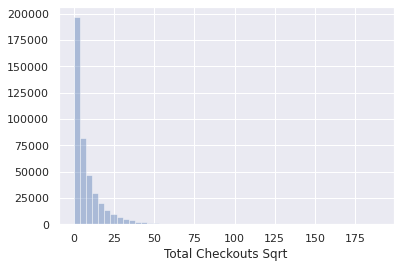

In [31]:
sns.distplot(df['Total Checkouts Sqrt'], kde=False)

In [32]:
IQR=(df['Total Checkouts Sqrt'].quantile(q=0.75) - df['Total Checkouts Sqrt'].quantile(q=0.25))*1.5
print(IQR)

13.823898375542331


In [33]:
x075=df['Total Checkouts Sqrt'].quantile(q=0.75)
print(x075)

10.63014581273465


In [34]:
xi = x075 + IQR
print(xi)

24.45404418827698


In [35]:
df_filtered_sqrt = df[(df['Total Checkouts Sqrt'] < xi)]
((df.shape[0]-df_filtered_sqrt.shape[0])/df.shape[0])*100

7.1264948706806965

In [36]:
# 7,12% sind nunmehr nur noch Ausreißer, weil wir die Zahlen geglättet (normalisiert) haben.

In [37]:
import numpy as np

df['Total Checkouts Log10']=np.log10(df['Total Checkouts'])

/home/michael/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [38]:
df['Total Checkouts Log10']

0             -inf
1         1.491362
2             -inf
3             -inf
4         2.100371
            ...   
423443    2.463893
423444    1.176091
423445    2.318063
423446    1.414973
423447        -inf
Name: Total Checkouts Log10, Length: 423448, dtype: float64

In [39]:
IQR=(df['Total Checkouts Log10'].quantile(q=0.75) - df['Total Checkouts Log10'].quantile(q=0.25))*1.5
print(IQR)

2.628072671729158


In [40]:
x075=df['Total Checkouts Log10'].quantile(q=0.75)
print(x075)

2.05307844348342


In [41]:
xi = x075 + IQR
print(xi)

4.681151115212578


In [42]:
# Abstand zu hoch, weil maximalwert überschritten
df['Total Checkouts Log10'].max()


4.555179121698849

In [43]:
df_filtered_log10 = df[(df['Total Checkouts Log10'] < xi)]
((df.shape[0]-df_filtered_log10.shape[0])/df.shape[0])*100

0.0

<AxesSubplot:xlabel='Total Checkouts Log10'>

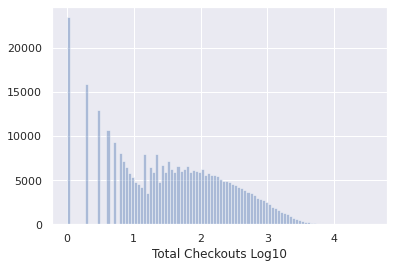

In [44]:
# infinite Werte machen probleme beim plotten
# sns.distplot(df['Total Checkouts Log10'], kde=False)
df['Total Checkouts Log10'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Total Checkouts Log10']=df['Total Checkouts Log10'].dropna()
sns.distplot(df['Total Checkouts Log10'], bins=100, kde=False)

In [45]:
alpha = 0.015
quantile = df['Total Checkouts Sqrt'].quantile([alpha, 1-alpha])
print(quantile)

0.015     0.000000
0.985    41.916584
Name: Total Checkouts Sqrt, dtype: float64


In [46]:
alpha = 0.015
quantile = df['Total Checkouts Log10'].quantile([alpha, 1-alpha])
print(quantile)

0.015    0.000000
0.985    3.283753
Name: Total Checkouts Log10, dtype: float64


## Kreuztabellen

In [47]:
import pandas as pd

df = pd.read_csv(
    "../data/Library_Usage.csv", 
    na_values="none"
)
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True
)

Notice Preference Definition,email,phone,print,All
Provided Email Address,,,,
False,95,58362,28569,87026
True,323842,9810,2767,336419
All,323937,68172,31336,423445


In [48]:
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True, normalize=1
)
#normalize spalten

Notice Preference Definition,email,phone,print,All
Provided Email Address,,,,
False,0.000293,0.856099,0.911699,0.205519
True,0.999707,0.143901,0.088301,0.794481


In [49]:
pd.crosstab(
    df['Provided Email Address'],
    df['Notice Preference Definition'],
    margins=True, normalize=0
)
# normalize zeilen

Notice Preference Definition,email,phone,print
Provided Email Address,,,
False,0.001092,0.670627,0.328281
True,0.962615,0.029160,0.008225
All,0.765004,0.160994,0.074003


In [50]:
import pandas as pd

df = pd.read_csv("../data/Library_Usage.csv")
df['Total Checkouts'].corr(df['Total Renewals'])


0.5893620279316908

## Aufgabe 3.8
3.8 Exkurs: Anscombe-Quartett (30 Min)

Das Anscombe Quartett ist ein Datenstatz, der aus 4 bivariaten Verteilungen besteht. Über die Spaltennamen ['x1', 'y1'], ['x2', 'y2'], ..., ['x4', 'y4'] können die zusammengehörenden Datenpaare ausgewählt werden.

    Lies den Datensatz ein.
    Berechne den Mittelwert, Median und die Standardabweichung der Spalten.
    Berechne jeweils die Korrelation zweier zusammenhängender Spalten [x<i>, y<i>].
    Erstelle jeweils ein Streudiagram zweier zusammenhängender Spalten [x<i>, y<i>].
    Was fällt Dir auf? Informiere Dich über den Datensatz hier.

In [51]:
import pandas as pd

df = pd.read_csv("../data/anscombe.csv")
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [52]:
df.keys()

Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'], dtype='object')

In [53]:
for i in df.keys():
    print(i)
    print("mean: " + str(df[i].mean()))
    print("median: " + str(df[i].median()))
    print("std: " + str(df[i].std()))
    print("")

x1
mean: 9.0
median: 9.0
std: 3.3166247903554

y1
mean: 7.500909090909093
median: 7.58
std: 2.031568135925815

x2
mean: 9.0
median: 9.0
std: 3.3166247903554

y2
mean: 7.500909090909091
median: 8.14
std: 2.0316567355016177

x3
mean: 9.0
median: 9.0
std: 3.3166247903554

y3
mean: 7.500000000000001
median: 7.11
std: 2.030423601123667

x4
mean: 9.0
median: 8.0
std: 3.3166247903554

y4
mean: 7.50090909090909
median: 7.04
std: 2.0305785113876023



In [54]:
#df_keys = df.keys()
#df[df_keys[0]].corr(df[df_keys[1]])
#df[df_keys[2]].corr(df[df_keys[3]])
#df[df_keys[4]].corr(df[df_keys[5]])
#df[df_keys[6]].corr(df[df_keys[7]])

In [55]:
print(df['x1'].corr(df['y1']))
print(df['x2'].corr(df['y2']))
print(df['x3'].corr(df['y3']))
print(df['x4'].corr(df['y4']))

0.81642051634484
0.8162365060002427
0.8162867394895982
0.8165214368885028


In [56]:
df['corr1'] = df['x1'].corr(df['y1'])
df['corr2'] = df['x2'].corr(df['y2'])
df['corr3'] = df['x3'].corr(df['y3'])
df['corr4'] = df['x4'].corr(df['y4'])

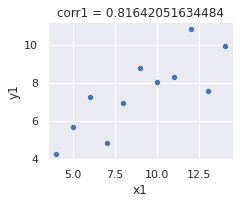

In [57]:
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
    
graph = sns.FacetGrid(col="corr1", data=df, col_wrap=3)
graph.map(sns.scatterplot, "x1", "y1")
graph

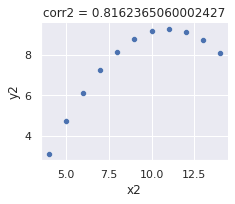

In [58]:
graph = sns.FacetGrid(col="corr2", data=df, col_wrap=3)
graph.map(sns.scatterplot, "x2", "y2")
graph

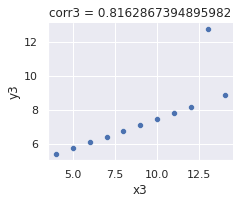

In [59]:
graph = sns.FacetGrid(col="corr3", data=df, col_wrap=3)
graph.map(sns.scatterplot, "x3", "y3")
graph

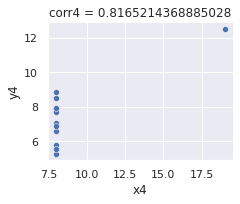

In [60]:
graph = sns.FacetGrid(col="corr4", data=df, col_wrap=3)
graph.map(sns.scatterplot, "x4", "y4")
graph

## 3.9 Balkendiagramme bei Fox News (15 Min)

    Was fällt Dir an den folgenden Diagrammen von FoxNews auf?
    -> es ist nur ein Ausschnitt aus y (oberes x-tel) oder es verwendet eine nicht-lineare Skala. Es ist irreführend, weil es den Abstand größer darstellt, als dieser tatsächlich ist
    
    Was würdest Du anders machen?
    -> ganze Balken zeigen (unschön, weil unterschied ggf. schlecht sichtbar), daher ggf. übereinanderlegen
    -> kennzeichnen, dass wir nur einen abschnitt sehen
    -> Tortendiagram verwenden? macht ein anderes Diagram das besser?
    -> wozu überhaupt Balken oder Diagram, wenn auch % geht -> 6/7,066 -> 0.84 -> 84%
    
    Welche Botschaft wollten die “Designer” vermutlich vermitteln? Passt die Botschaft mit den Daten zusammen? (s. auch Quelle und Hintergründe oder auch dieses Beispiel)
    -> Botschaft -> das Ziel wurde verfehlt -> "stark verfehlt" usw.
    -> nein, 84% erreicht ist ein guter Wert...oder der Sprung von 35% auf 39% ist 4% (absolut) bzw. 11% (relativ)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

# use sample to generate a random subsample
df = pd.read_csv("../data/Library_Usage.csv").sample(n=1000)

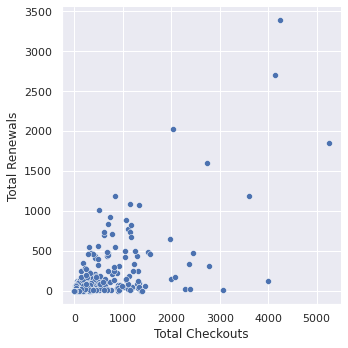

In [62]:
sns.relplot(x='Total Checkouts', y='Total Renewals', data=df)

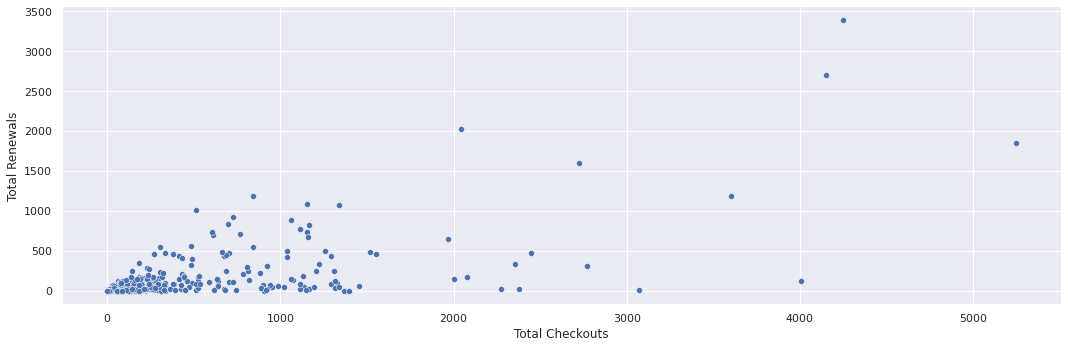

In [63]:
sns.relplot(x='Total Checkouts', y='Total Renewals', data=df, height=5, aspect=3)

In [64]:
plt.savefig('../tutorial.png', dpi=150)

<Figure size 432x288 with 0 Axes>

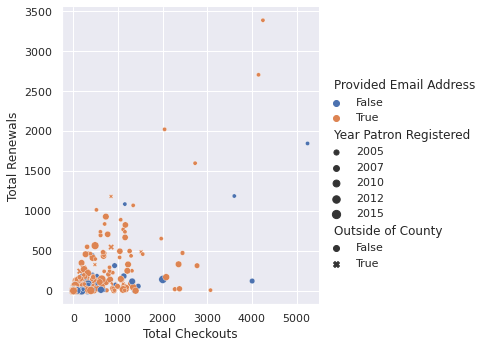

In [65]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
                hue='Provided Email Address', style='Outside of County', 
                size='Year Patron Registered', data=df)

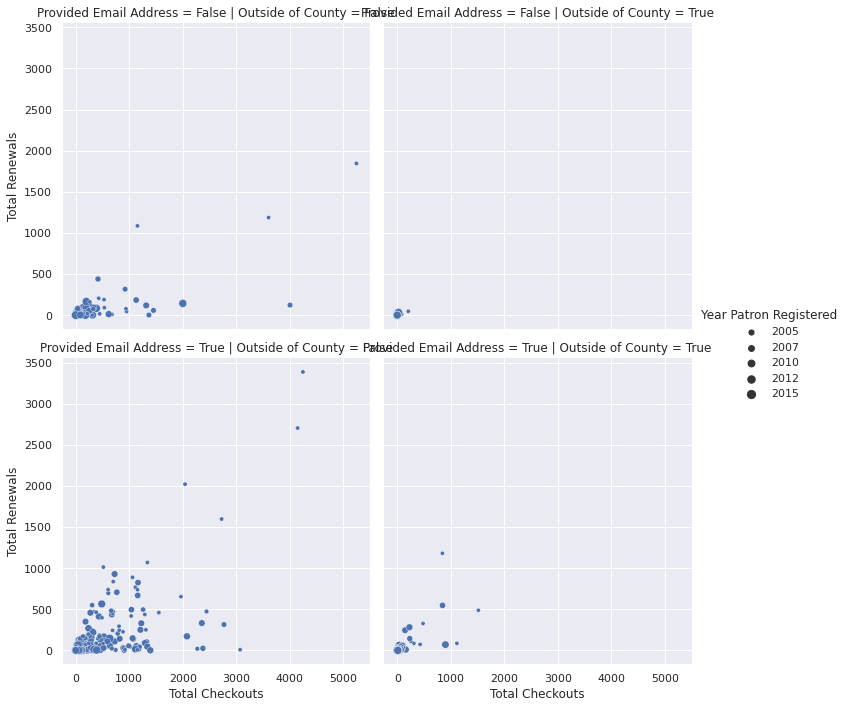

In [66]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            size='Year Patron Registered',
            row='Provided Email Address', col='Outside of County', data=df)

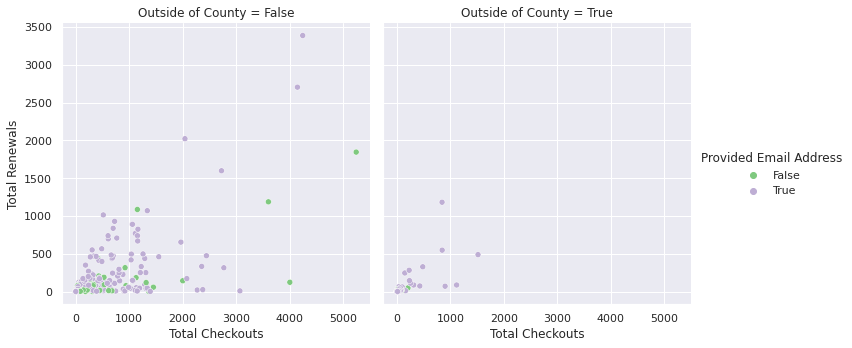

In [67]:
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            hue='Provided Email Address', 
            col='Outside of County',
            palette=sns.color_palette('Accent', 2), 
            data=df)

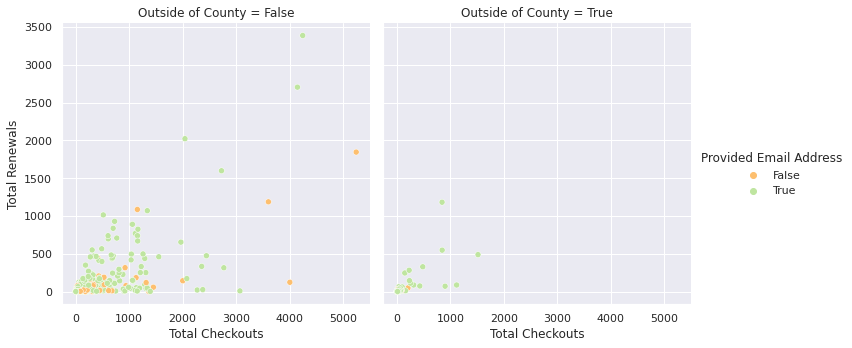

In [68]:
# https://s3.amazonaws.com/codecademy-content/programs/dataviz-python/unit-5/seaborn-design-2/article2_image9.png
sns.relplot(x='Total Checkouts', y='Total Renewals', 
            hue='Provided Email Address', 
            col='Outside of County',
            palette=sns.color_palette('Spectral', 2), 
            data=df)

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# matplotlib inline
sns.set()

#df = pd.read_csv("../data/Library_Usage.csv")

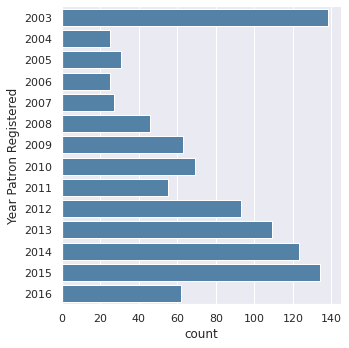

In [70]:
sns.catplot(y='Year Patron Registered',
            data=df, kind='count', color="steelblue")

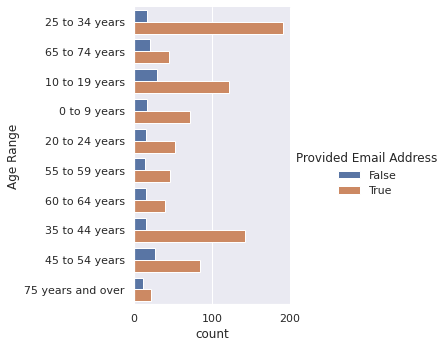

In [71]:
sns.catplot(y='Age Range', hue='Provided Email Address', 
            data=df, kind='count')

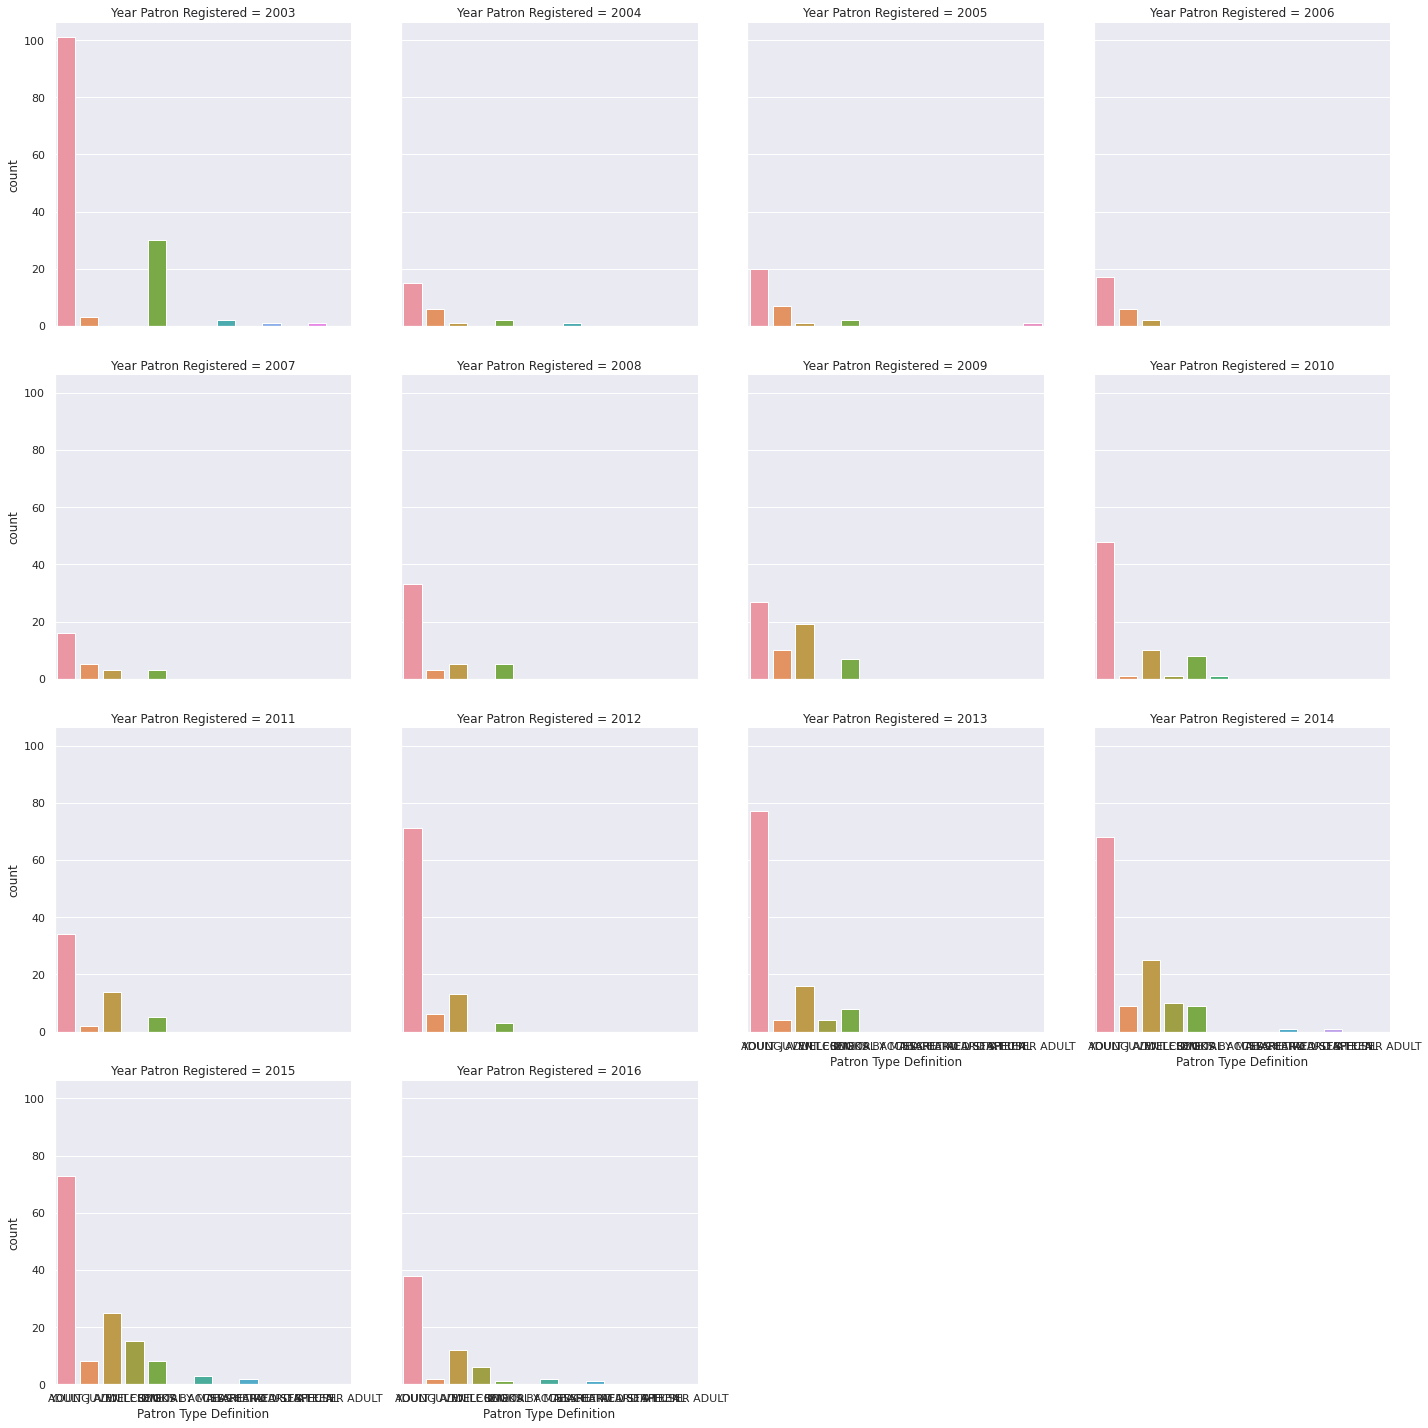

In [72]:
sns.catplot(x='Patron Type Definition', 
            data=df, kind='count', 
            col='Year Patron Registered', col_wrap=4)

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Renewals'>

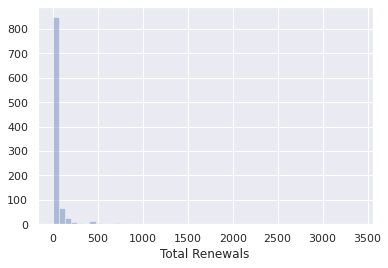

In [73]:
# Histogram

sns.distplot(df['Total Renewals'], kde=False)

<AxesSubplot:xlabel='Total Renewals', ylabel='Density'>

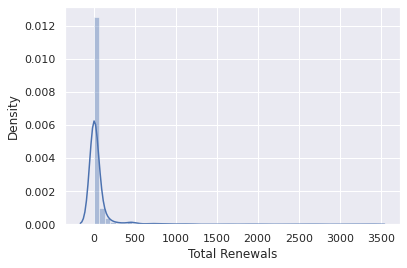

In [74]:
# With density estimation

sns.distplot(df['Total Renewals'], kde=True)

/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/michael/anaconda3/lib/python3.9/site-packages/seaborn/categori

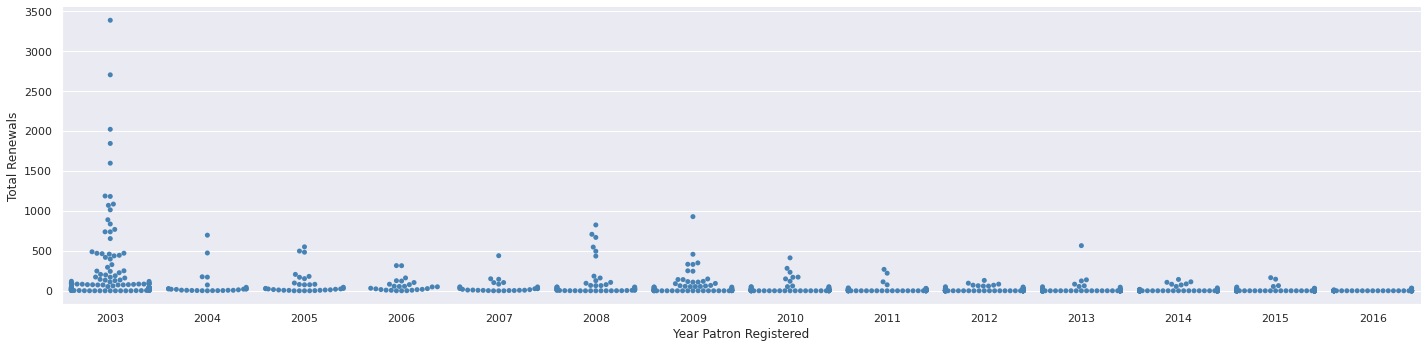

In [75]:
# Swarmplot

sns.catplot(x='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='swarm', color="steelblue", aspect=4)

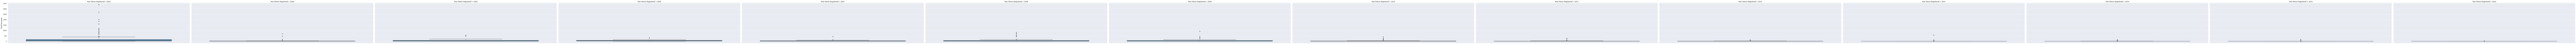

In [76]:
# Boxplot

sns.catplot(col='Year Patron Registered', y = 'Total Renewals',
            data=df, kind='box', color="steelblue", aspect=4)

In [77]:
df.keys()

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Outside of County', 'Supervisor District'],
      dtype='object')

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# matplotlib inline
sns.set()

df = pd.read_csv("../data/Library_Usage.csv")
x = df[(df['Age Range'] == "0 to 9 years") & (df['Provided Email Address'] == True)].shape[0]
y = df[(df['Age Range'] == "0 to 9 years")].shape[0]
print(x/y)

0.7410177291982637


In [98]:
alpha = 0.4
quantile = df['Total Checkouts'].quantile([alpha, 1-alpha])
print(quantile)

0.4     9.0
0.6    39.0
Name: Total Checkouts, dtype: float64


In [99]:
IQR=(df['Total Renewals'].quantile(q=0.75) - df['Total Renewals'].quantile(q=0.25))*1.5
print(IQR)

40.5


In [100]:
df['Total Renewals'].quantile([0.25, 0.75]).diff()

0.25     NaN
0.75    27.0
Name: Total Renewals, dtype: float64

In [101]:
df['Age Range'].mode()

0    25 to 34 years
dtype: object

In [102]:
df['Total Checkouts'].quantile(0.60)

39.0